In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
import matplotlib.pyplot as plt 

In [4]:
from src.utils.io.read import RawDataReader

In [5]:
from src.settings import Settings

In [6]:
from src.utils.dates import get_nyse_business_dates

In [7]:
wti_prices_panel = pd.read_csv(Settings.backfill.paths.PREPROCESSED_DATA_PATH / 'wti_prices_panel.csv')

In [8]:
wti_prices_panel.tail(2)

,Unnamed: 0,tradeDate,Name,F1_Price,F2_Price,F3_Price,F1_RolledPrice,F2_RolledPrice,F3_RolledPrice,month,...,forward_10D_F1MinusF2_RolledPrice_change,forward_11D_F1MinusF2_RolledPrice_change,forward_12D_F1MinusF2_RolledPrice_change,forward_13D_F1MinusF2_RolledPrice_change,forward_14D_F1MinusF2_RolledPrice_change,forward_15D_F1MinusF2_RolledPrice_change,forward_16D_F1MinusF2_RolledPrice_change,forward_17D_F1MinusF2_RolledPrice_change,forward_18D_F1MinusF2_RolledPrice_change,forward_19D_F1MinusF2_RolledPrice_change
3899,3910,2025-07-03,CL,67.00,65.62,64.4,67.00,65.62,64.4,2025-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3900,3911,2025-07-07,CL,67.93,66.49,65.2,67.93,66.49,65.2,2025-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
wti_prices_panel.columns.tolist()

['Unnamed: 0',
 'tradeDate',
 'Name',
 'F1_Price',
 'F2_Price',
 'F3_Price',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'month',
 'F1MinusF2_RolledPrice',
 'prior_1D_F1_RolledPrice_change',
 'prior_2D_F1_RolledPrice_change',
 'prior_3D_F1_RolledPrice_change',
 'prior_4D_F1_RolledPrice_change',
 'prior_5D_F1_RolledPrice_change',
 'prior_6D_F1_RolledPrice_change',
 'prior_7D_F1_RolledPrice_change',
 'prior_8D_F1_RolledPrice_change',
 'prior_9D_F1_RolledPrice_change',
 'prior_10D_F1_RolledPrice_change',
 'prior_11D_F1_RolledPrice_change',
 'prior_12D_F1_RolledPrice_change',
 'prior_13D_F1_RolledPrice_change',
 'prior_14D_F1_RolledPrice_change',
 'prior_15D_F1_RolledPrice_change',
 'prior_16D_F1_RolledPrice_change',
 'prior_17D_F1_RolledPrice_change',
 'prior_18D_F1_RolledPrice_change',
 'prior_19D_F1_RolledPrice_change',
 'F1_RolledPrice_rolling_20D_volatility',
 'prior_1D_F2_RolledPrice_change',
 'prior_2D_F2_RolledPrice_change',
 'prior_3D_F2_RolledPrice_change',
 'prior_

In [10]:
wti_prices_panel.sort_values(by='tradeDate', ascending = True, inplace = True)

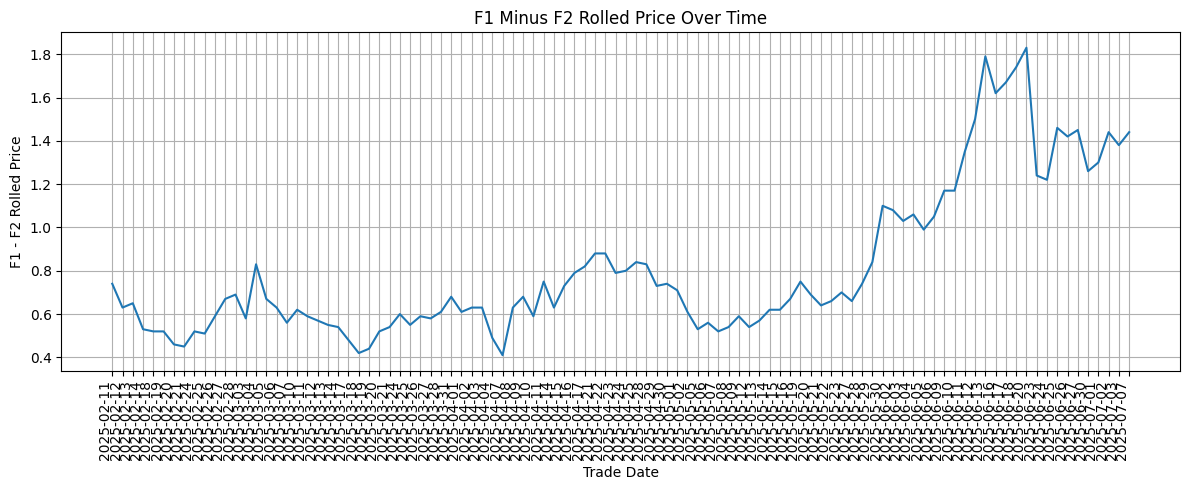

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure
plt.figure(figsize=(12, 5))

# Plot the data
plt.plot(
    wti_prices_panel.tail(100)['tradeDate'],
    wti_prices_panel.tail(100)['F1MinusF2_RolledPrice'],
    '-'
)

# # Improve x-axis formatting
# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Smart date intervals
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format
# plt.xticks(rotation=45, ha='right')  # Rotate and align

# # Optional: reduce font size if still crowded
# plt.tick_params(axis='x', labelsize=8)

# Labels and title
plt.xlabel('Trade Date')
plt.ylabel('F1 - F2 Rolled Price')
plt.title('F1 Minus F2 Rolled Price Over Time')
plt.xticks(rotation=90, ha='right')  # Rotate and align
plt.grid(True)

# Prevent clipping of tick labels
plt.tight_layout()

# Show the plot
plt.show()


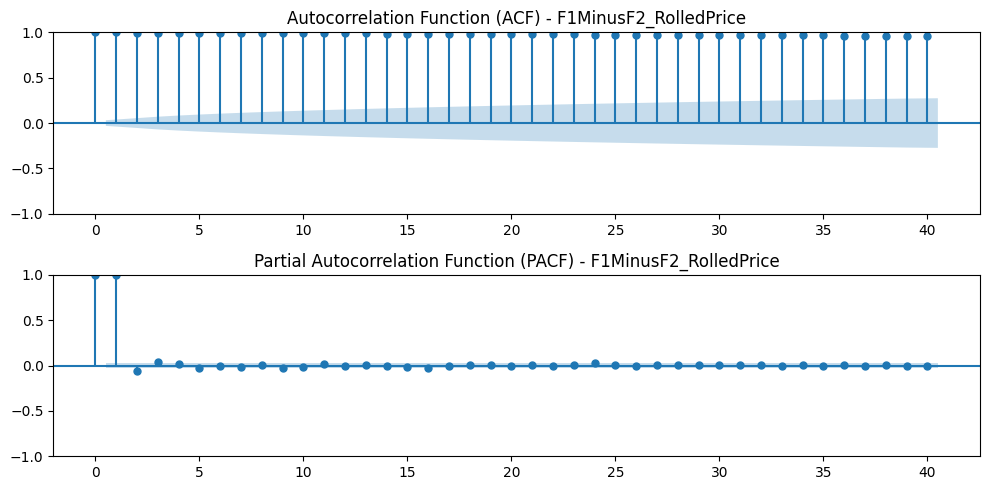

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Plot ACF
plot_acf(wti_prices_panel['F1MinusF2_RolledPrice'].dropna(), 
         lags=40, 
         ax=axes[0], 
         title='Autocorrelation Function (ACF) - F1MinusF2_RolledPrice')

# Plot PACF
plot_pacf(wti_prices_panel['F1MinusF2_RolledPrice'].dropna(), 
          lags=40, 
          ax=axes[1], 
          title='Partial Autocorrelation Function (PACF) - F1MinusF2_RolledPrice')

plt.tight_layout()
plt.show()

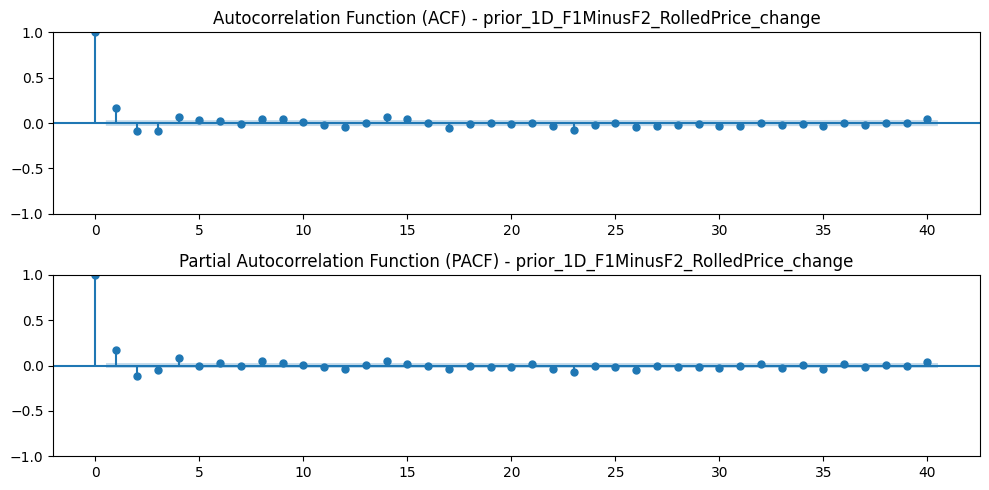

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Plot ACF
plot_acf(wti_prices_panel['prior_1D_F1MinusF2_RolledPrice_change'].dropna(), 
         lags=40, 
         ax=axes[0], 
         title='Autocorrelation Function (ACF) - prior_1D_F1MinusF2_RolledPrice_change')

# Plot PACF
plot_pacf(wti_prices_panel['prior_1D_F1MinusF2_RolledPrice_change'].dropna(), 
          lags=40, 
          ax=axes[1], 
          title='Partial Autocorrelation Function (PACF) - prior_1D_F1MinusF2_RolledPrice_change')

plt.tight_layout()
plt.show()